In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

In [2]:
data=pd.read_csv("Dataset/data.csv",header=None)

In [3]:
X=np.array(data.iloc[:2,:])
X[:1,:10]

array([[1.20444229, 0.1587099 , 0.0952472 , 0.34917847, 0.69415038,
        1.62065038, 1.53856225, 0.03630856, 0.47459111, 0.16569583]])

In [4]:
y=data.iloc[2:,:]
y=np.array(y.astype(int))
y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
#Complete Data Summary
print("X Data Shape",X.shape)
print("y Data Shape",y.shape)
m=y.shape[1]
print("Training examples ::",m)

X Data Shape (2, 400)
y Data Shape (1, 400)
Training examples :: 400


# Objective
Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

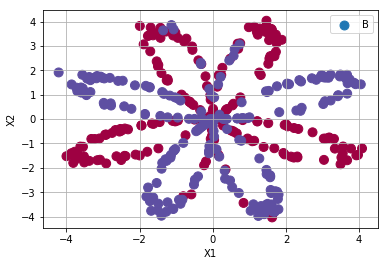

In [6]:
# Visualize the data:
#X[0,:] is X axis
#X[1,:] is Y axis
#y is label
#size equals 40
#spectral colour map : More https://matplotlib.org/examples/color/colormaps_reference.html


plt.scatter(X[0, :], X[1, :], c=np.ravel(y), s=80, cmap=plt.cm.Spectral);
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend("Blue")
plt.grid()

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1)

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="Images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

# 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [7]:
def layer_sizes(X,y):
    n_x=X.shape[0]
    n_h=4
    n_y=y.shape[0]
    return n_x,n_h,n_y

In [8]:
n_x,n_h,n_y=layer_sizes(X,y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


# 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    w1=np.random.randn(n_h,n_x)
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)
    b2=np.zeros((n_y,1))
    
    parameters={'w1':w1,'b1':b2,'w2':w2,'b2':b2}
    return parameters

In [10]:
initialize_parameters(2,4,1)

{'w1': array([[-1.86544106e+00, -6.10910494e-01],
        [-2.21448131e+00, -8.39157842e-01],
        [ 3.00515691e-01, -2.04944865e-03],
        [ 1.45065956e+00, -2.53250811e+00]]),
 'b1': array([[0.]]),
 'w2': array([[-0.49170064, -2.36789036,  0.36224905,  0.67719071]]),
 'b2': array([[0.]])}

# 4.3 - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [11]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [12]:
def forward_propagation(X, parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,X+b1)
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    cache={'z1':z1,'a1':z1,'z2':z2,'a2':a2}
    return a2,cache

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [13]:
def compute_cost(a2,y,parameters):
    m=y.shape[1]
    cost=(-1/m)*np.sum(np.multiply(y,np.log(a2))+np.multiply((1-y),np.log(1-a2)))
    return cost

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="Images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [14]:
def der_sig(z):
    s=z*(1-z)
    return s

In [15]:
def der_tanh(z):
    s=1-np.square(z)
    return s

In [16]:
def backward_propagation(parameters,cache,X,y):
    m=y.shape[1]
    
    w1=parameters['w1']
    w2=parameters['w2']
    
    a1=cache['a1']
    a2=cache['a2']
    
    dz2=a2-y
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    dz1=np.dot(w2.T,dz2)*der_tanh(a1)
    dw1=(1/m)*np.dot(dz1,X.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads={"db1":db1,'db2':db2,'dw1':dw1,'dw2':dw2}
    return grads

In [17]:
def update_parameters(parameters,grads,learning_rate):
    dw1=grads['dw1']
    dw2=grads['dw2']
    db1=grads['db1']
    db2=grads['db2']
    
    w1=parameters['w1']
    w2=parameters['w2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    w1=w1-learning_rate*dw1
    w2=w2-learning_rate*dw2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    parameters={'w1':w1,'b1':b2,'w2':w2,'b2':b2}

    return parameters


## 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [18]:
def nn_model(X,y,n_h,num_iterations,learning_rate):
    
    n_x,n_h1,n_y=layer_sizes(X,y)
    #we are not taking this hidden layer
    parameters=initialize_parameters(n_x,n_h,n_y)
    w1=parameters['w1']
    w2=parameters['w2']
    b1=parameters['b1']
    b2=parameters['b2']
    costs=[]
    
    for i in range(num_iterations):
        a2,cache=forward_propagation(X,parameters)
        cost=compute_cost(a2,y,parameters)
        costs.append(cost)
        grads=backward_propagation(parameters,cache,X,y)
        parameters=update_parameters(parameters,grads,learning_rate)
        
    return parameters,costs

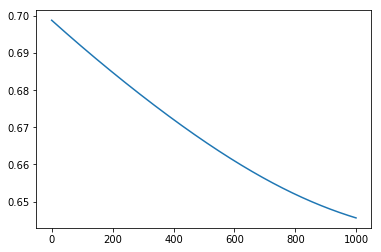

In [19]:
parameters,costs=nn_model(X,y,4,1000,0.0001)
plt.plot(costs)